In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

# Загружаем файл
uploaded = files.upload()

Saving 2024Populations.csv to 2024Populations.csv


In [15]:
import pandas as pd

dataset = pd.read_csv("2024Populations.csv", encoding='utf-8')

print(dataset.keys())

Index(['rank', 'country', 'TwoLetterID', 'unMember', 'pop1980', 'pop2000',
       'pop2010', 'pop2023', 'pop2024', 'pop2030', 'pop2050', 'landAreaKm',
       '2024YoYChange', '2024YoYGrowthRate', '2024WorldPercentage',
       'Density_2024'],
      dtype='object')


In [16]:
# Первые 5 строк
dataset.head()

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,True,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.0,13092189,0.009164,0.177614,484.906734
1,2,China,CN,True,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.9,-492570,-0.000346,0.175577,151.217370
2,3,United States,US,True,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.0,1817857,0.005347,0.042110,37.367304
3,4,Indonesia,ID,True,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.0,2263927,0.008157,0.034470,149.025416
4,5,Pakistan,PK,True,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.0,4724157,0.019644,0.030209,318.090773


In [17]:
# Подключение к SQLite базе данных
conn = sqlite3.connect('database.db')
cursor = conn.cursor()

In [18]:
# Создание новой таблицы
create_table_query = '''
CREATE TABLE IF NOT EXISTS population (
 rank INTEGER PRIMARY KEY,
    Country TEXT,
    TwoLetterID TEXT,
    unMember BOOLEAN,
    Pop1980 INTEGER,
    Pop2000 INTEGER,
    Pop2010 INTEGER,
    Pop2023 INTEGER,
    Pop2024 INTEGER,
    Pop2030 INTEGER,
    Pop2050 INTEGER
);
'''
cursor.execute(create_table_query)
conn.commit()

In [19]:
# Вставка данных в таблицу базы данных
dataset.to_sql('population', conn, if_exists='replace', index=False)

234

In [20]:
cursor.execute("SELECT * FROM population ; ")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'India', 'IN', 1, 696828385, 1059633675, 1240613620, 1428627663, 1441719852, 1514994080, 1670490596, 2973190.0, 13092189, 0.009164171561, 0.1776143473, 484.9067338)
(2, 'China', 'CN', 1, 982372466, 1264099069, 1348191368, 1425671352, 1425178782, 1415605906, 1312636325, 9424702.9, -492570, -0.0003455003843, 0.175576551, 151.2173696)
(3, 'United States', 'US', 1, 223140018, 282398554, 311182845, 339996563, 341814420, 352162301, 375391963, 9147420.0, 1817857, 0.005346692284, 0.04211022345, 37.36730357)
(4, 'Indonesia', 'ID', 1, 148177096, 214072421, 244016173, 277534122, 279798049, 292150100, 317225213, 1877519.0, 2263927, 0.008157292457, 0.03447004478, 149.0254155)
(5, 'Pakistan', 'PK', 1, 80624057, 154369924, 194454498, 240485658, 245209815, 274029836, 367808468, 770880.0, 4724157, 0.01964423592, 0.03020890722, 318.0907729)
(6, 'Nigeria', 'NG', 1, 72951439, 122851984, 160952853, 223804632, 229152217, 262580426, 377459883, 910770.0, 5347585, 0.02389398715, 0.02823067283, 251.6027285)

In [21]:
cursor.execute("SELECT * FROM Population WHERE pop1980 > 100000000 ; ")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'India', 'IN', 1, 696828385, 1059633675, 1240613620, 1428627663, 1441719852, 1514994080, 1670490596, 2973190.0, 13092189, 0.009164171561, 0.1776143473, 484.9067338)
(2, 'China', 'CN', 1, 982372466, 1264099069, 1348191368, 1425671352, 1425178782, 1415605906, 1312636325, 9424702.9, -492570, -0.0003455003843, 0.175576551, 151.2173696)
(3, 'United States', 'US', 1, 223140018, 282398554, 311182845, 339996563, 341814420, 352162301, 375391963, 9147420.0, 1817857, 0.005346692284, 0.04211022345, 37.36730357)
(4, 'Indonesia', 'ID', 1, 148177096, 214072421, 244016173, 277534122, 279798049, 292150100, 317225213, 1877519.0, 2263927, 0.008157292457, 0.03447004478, 149.0254155)
(7, 'Brazil', 'BR', 1, 122288383, 175873720, 196353492, 216422446, 217637297, 223908968, 230885725, 8358140.0, 1214851, 0.005613331808, 0.02681207892, 26.03896286)
(9, 'Russia', 'RU', 1, 138257420, 146844839, 143242599, 144444359, 143957079, 141432741, 133133035, 16376870.0, -487280, -0.003373478919, 0.01773495911, 8.79026

In [22]:
cursor.execute("SELECT SUM(pop1980) AS [sum population 1980] FROM Population ; ")
result = cursor.fetchall()
for row in result:
    print(row)

(4442400374,)


In [23]:
cursor.execute("SELECT AVG(pop2000) AS [average population 2000] FROM population;")
result = cursor.fetchall()
for row in result:
    print(row)

(26269468.816239316,)


In [24]:
cursor.execute("SELECT COUNT(population.country) FROM population WHERE Country LIKE 'A%';")
result = cursor.fetchall()
for row in result:
    print(row)

(14,)


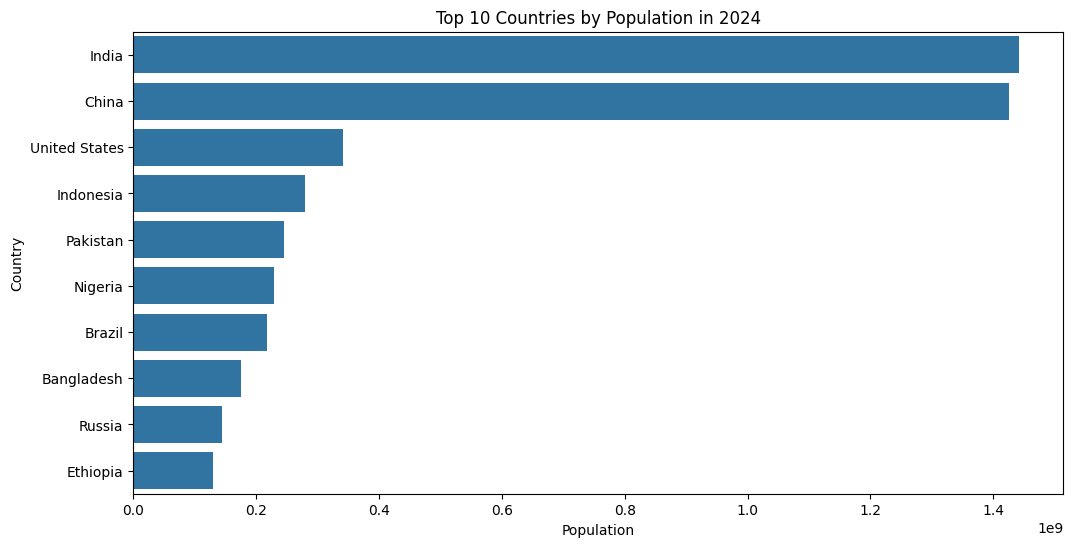

In [25]:
#Визуализация
top_10_pop_2024 = dataset.sort_values(by='pop2024', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='pop2024', y='country', data=top_10_pop_2024)
plt.title('Top 10 Countries by Population in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

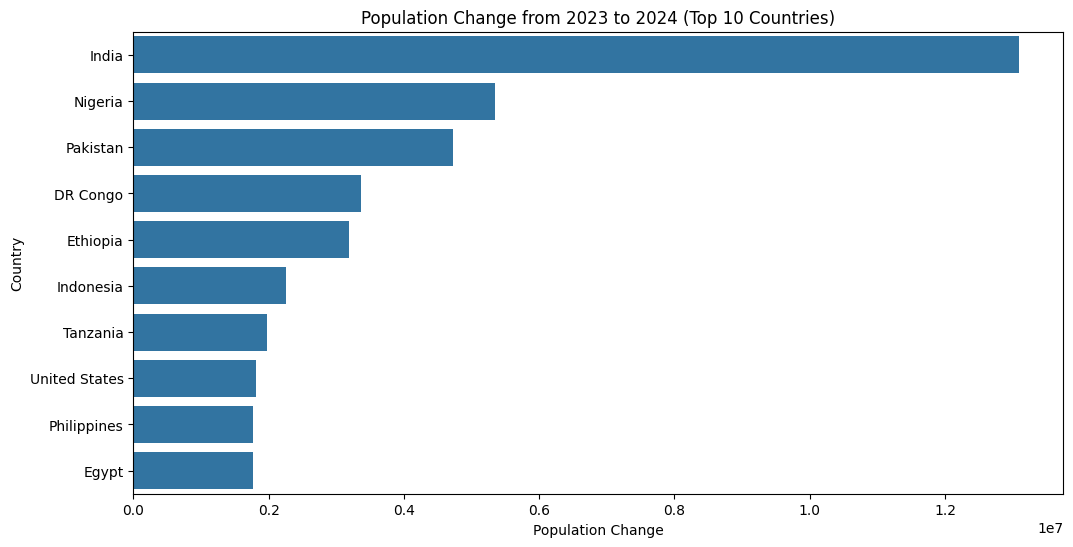

In [26]:
top_10_pop_change = dataset.sort_values(by='2024YoYChange', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='2024YoYChange', y='country', data=top_10_pop_change)
plt.title('Population Change from 2023 to 2024 (Top 10 Countries)')
plt.xlabel('Population Change')
plt.ylabel('Country')
plt.show()

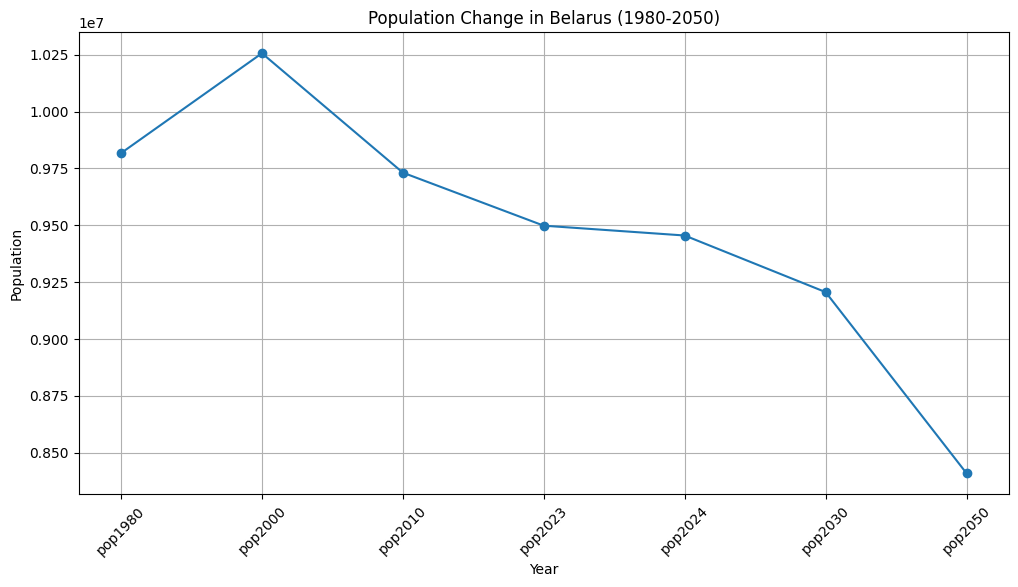

In [27]:
belarus_data = dataset[dataset['country'] == 'Belarus']
plt.figure(figsize=(12, 6))
plt.plot(belarus_data.columns[4:11], belarus_data.iloc[0, 4:11], marker='o')
plt.title('Population Change in Belarus (1980-2050)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()